In [ ]:
# !pip install -U scikit-learn

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [6]:
titanic = pd.read_csv('../data/titanic.csv')

# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [11]:
titanic = titanic.drop('Cabin',axis=1)

# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [14]:
print('missing values: ' + f'{titanic.isna().sum()}')
titanic = titanic.dropna()

missing values:PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [15]:
print('missing values: ' + f'{titanic.isna().sum().sum()}')

missing values:0


# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [17]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [ ]:
"""
PassengerId - Ids of passangers
Survived - define if passanger survived or not: 1 survived, 0 didn't
Pclass - class of passanger, 1, 2 or 3
Name - Name of passanger
Sex - male or female
Age - Age of passangers, in years, min 0.42 and max of 80
SibSp - number of siblings/spouses on board, min 0 max 5
Parch - number of parents/children aboard the Titanic, min 0, max 6
Ticket - number of the ticket
Fare - How much the person paid for the fare.
Embarked - Port of Embarkation

"""

# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

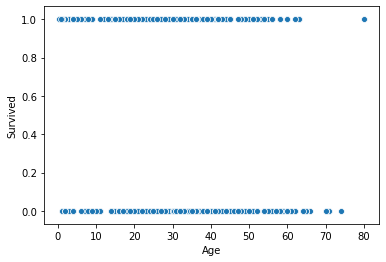

In [21]:
sns.scatterplot(x='Age',y='Survived',data=titanic)

Now do the same for the columns 'Fare' and 'Survived'

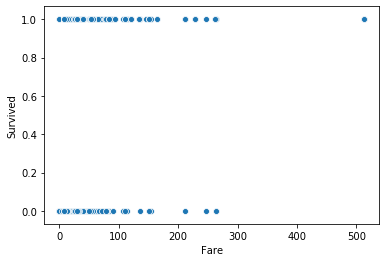

In [22]:
sns.scatterplot(x='Fare',y='Survived',data=titanic)

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

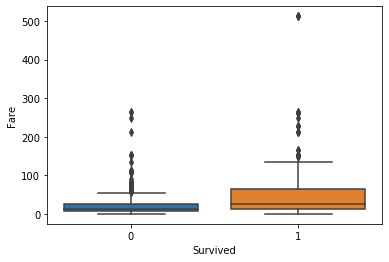

In [25]:
sns.boxplot(y='Fare',x='Survived',data=titanic)

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [28]:
pd.crosstab(index=titanic.Age, columns=titanic.Survived)

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


Now perform the same operation for `Pclass` and `Survived`

In [29]:
pd.crosstab(index=titanic.Pclass, columns=titanic.Survived)

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


What can you infer from that?

In [ ]:
""" 
its easier to analyse data with crosstab, with you are analyzing a binary variable and a category
with few categories (Pclass vs. Survived), it's also easier to take a look at correlation.
For Age and Survived, its better to analyse with plots like boxplot.

"""

# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


In [33]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


2. Correlation Heatmap

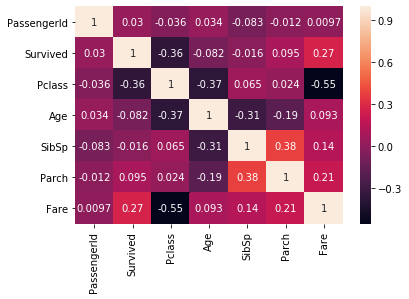

In [35]:
sns.heatmap(titanic.corr(), annot=True)

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

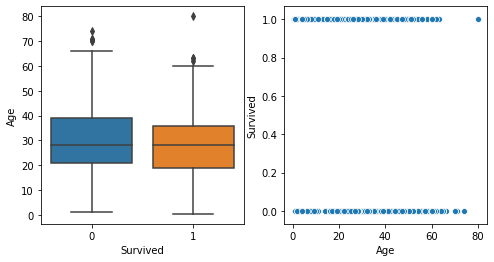

In [45]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

sns.boxplot(y='Age',x='Survived',data=titanic, ax=ax[0])
sns.scatterplot(x='Age',y='Survived',data=titanic, ax=ax[1])

In [ ]:
"""



"""

# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

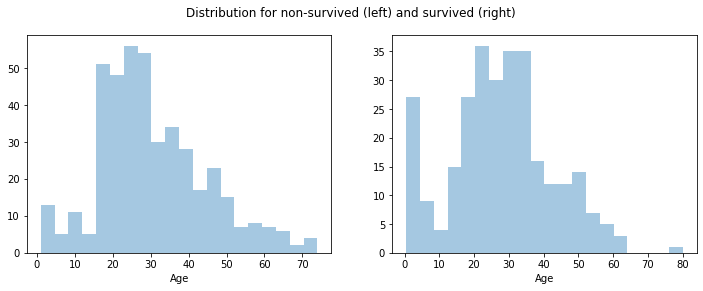

In [106]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

sns.distplot(titanic.query('Survived == 0').Age,bins = 20,ax=ax[0],kde=False)
sns.distplot(titanic.query('Survived == 1').Age,bins = 20,ax=ax[1],kde=False)
fig.suptitle('Distribution for non-survived (left) and survived (right)')
plt.show()

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

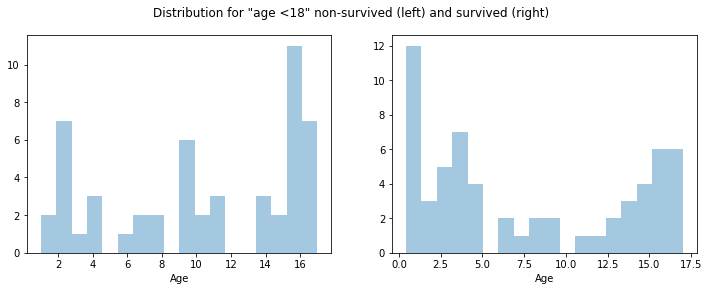

In [80]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

sns.distplot(titanic.query('Survived == 0').query('Age < 18').Age,bins = 18, ax=ax[0],kde=False)
sns.distplot(titanic.query('Survived == 1').query('Age < 18').Age,bins = 18, ax=ax[1],kde=False)
fig.suptitle('Distribution for "age <18" non-survived (left) and survived (right)')
plt.show()

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate to `Age`'s linear correlation coefficient? 

In [ ]:
"""
The correlation as seem previously is low. Apart from babies (<2 years) being more likely to survive,
both distributions are quite similar. This indicates explains the low correlation between age
and change of survival.

"""

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [97]:
df1 = titanic.loc[:,['Sex','Age','Survived']].query('Sex == "male" & Age < 9')
df2 = titanic.loc[:,['Sex','Age','Survived']].query('Sex == "male" & Age > 9 & Age < 18')

In [103]:
print(f'Chance of survival for condition 1: {round(df1.Survived.mean()*100,2)}')
print(f'Chance of survival for condition 2: {round(df2.Survived.mean()*100,2)}')

Chance of survival for condition 1: 60.71
Chance of survival for condition 2: 15.38


*To think:* If you were told then, to predict if a 15 year old man have survived, what would you predict?

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


In [109]:
X = titanic.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [107]:
y = titanic['Survived']

# Dummify your dataset

Create a dummy version of your `X` dataset. After obtaining the dummification of your features, you'll observe that some  You won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

In [110]:
X = pd.get_dummies(X,drop_first=True)

# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

In [118]:
titanic_train = pd.concat([X_train, y_train],axis=1)
titanic_test = pd.concat([X_test, y_test],axis=1)

# And store it on your own folder.

In [119]:
titanic_train.to_csv('titanic_train.csv', index=False)
titanic_test.to_csv('titanic_test.csv', index=False)